In [4]:
import requests
import os

# List of URLs for CSV files
urls = [
    "http://airfoiltools.com/polar/csv?polar=xf-naca0015-il-50000",
    "http://airfoiltools.com/polar/csv?polar=xf-naca0015-il-50000-n5",
    "http://airfoiltools.com/polar/csv?polar=xf-naca0015-il-100000",
    "http://airfoiltools.com/polar/csv?polar=xf-naca0015-il-100000-n5",
    "http://airfoiltools.com/polar/csv?polar=xf-naca0015-il-200000",
    "http://airfoiltools.com/polar/csv?polar=xf-naca0015-il-200000-n5",
    "http://airfoiltools.com/polar/csv?polar=xf-naca0015-il-500000",
    "http://airfoiltools.com/polar/csv?polar=xf-naca0015-il-500000-n5"
    # More URLs can be added if needed.
]

# Define User-Agent for the download
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Loop through the URLs
for url in urls:
    # Generate a filename from the URL
    filename = url.split('polar=')[-1] + ".csv"

    # Send a request to the URL
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Save content to a file
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"File '{filename}' downloaded and saved ")
    else:
        print(f"Error downloading '{filename}'. Status code: {response.status_code}")

# Check which files were downloaded
print("Downloaded files:")
print(os.listdir())


File 'xf-naca0015-il-50000.csv' downloaded and saved 
File 'xf-naca0015-il-50000-n5.csv' downloaded and saved 
File 'xf-naca0015-il-100000.csv' downloaded and saved 
File 'xf-naca0015-il-100000-n5.csv' downloaded and saved 
File 'xf-naca0015-il-200000.csv' downloaded and saved 
File 'xf-naca0015-il-200000-n5.csv' downloaded and saved 
File 'xf-naca0015-il-500000.csv' downloaded and saved 
File 'xf-naca0015-il-500000-n5.csv' downloaded and saved 
Downloaded files:
['.ipynb_checkpoints', 'naca0015_calc.ipynb', 'naca0015_fin.ipynb', 'xf-naca0015-il-100000-n5.csv', 'xf-naca0015-il-100000-nCrit5.csv', 'xf-naca0015-il-100000-nCrit9.csv', 'xf-naca0015-il-100000.csv', 'xf-naca0015-il-200000-n5.csv', 'xf-naca0015-il-200000-nCrit5.csv', 'xf-naca0015-il-200000-nCrit9.csv', 'xf-naca0015-il-200000.csv', 'xf-naca0015-il-50000-n5.csv', 'xf-naca0015-il-50000-nCrit5.csv', 'xf-naca0015-il-50000-nCrit9.csv', 'xf-naca0015-il-50000.csv', 'xf-naca0015-il-500000-n5.csv', 'xf-naca0015-il-500000-nCrit5.csv', '

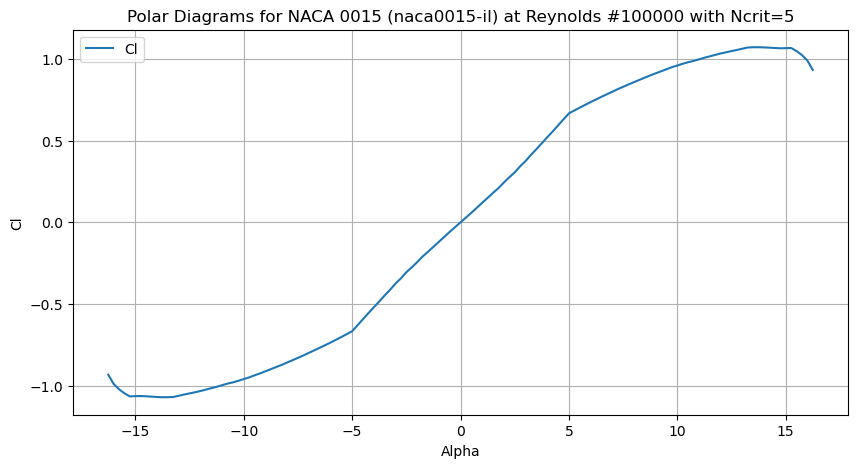

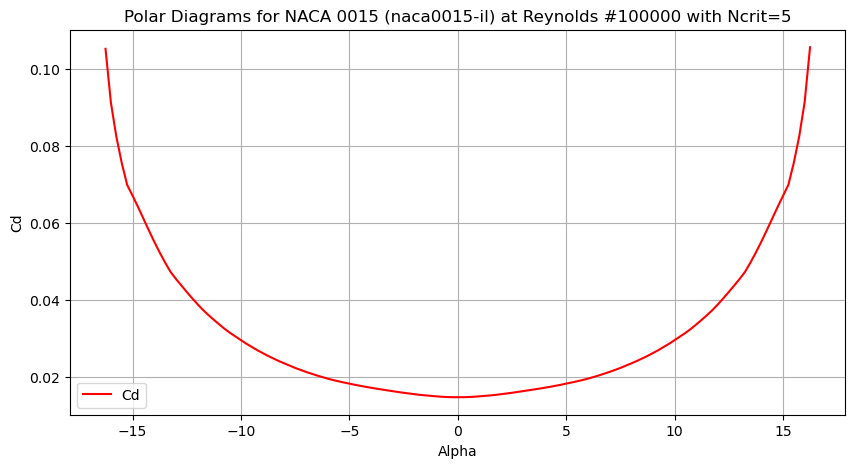

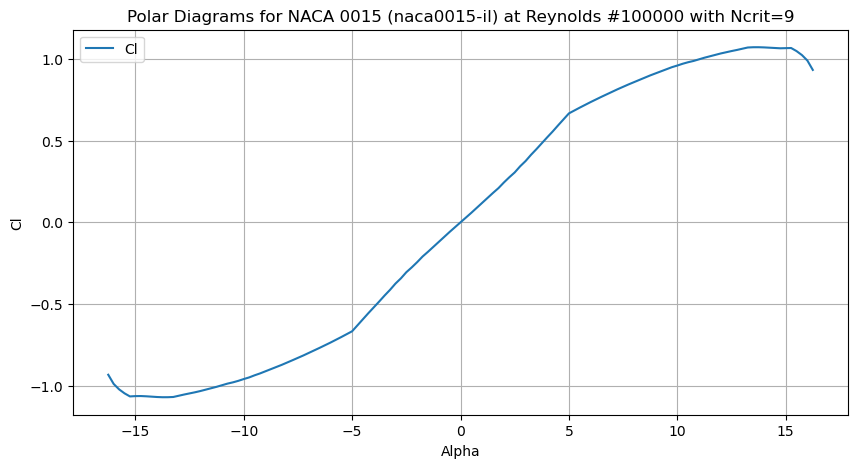

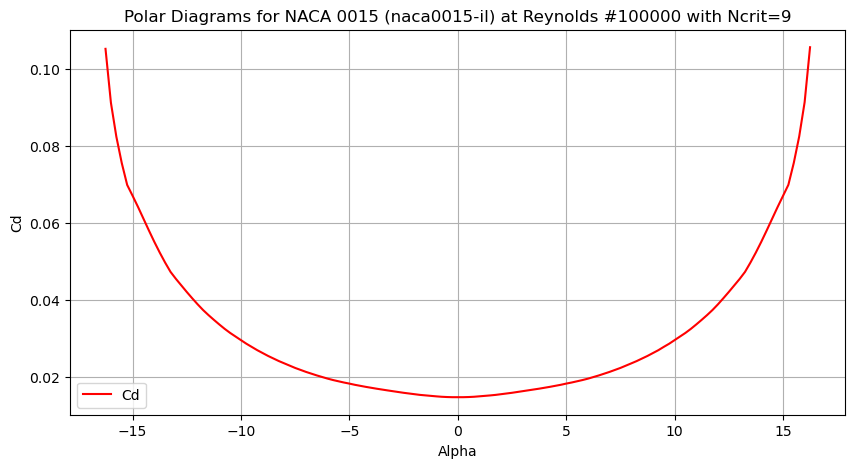

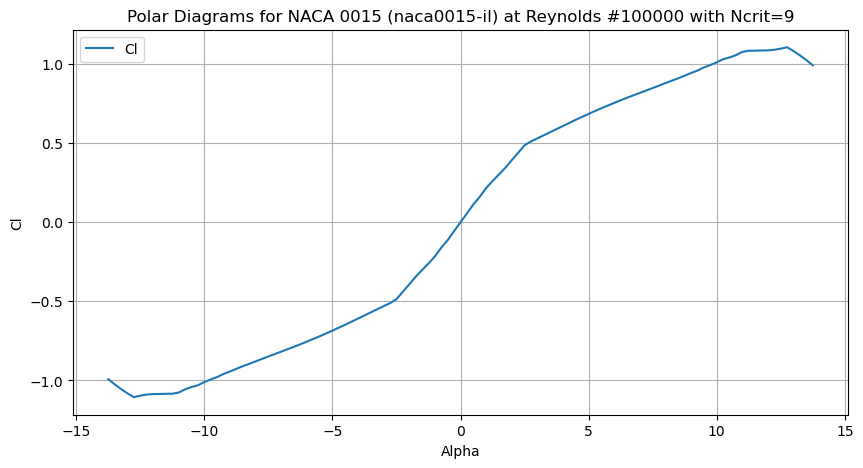

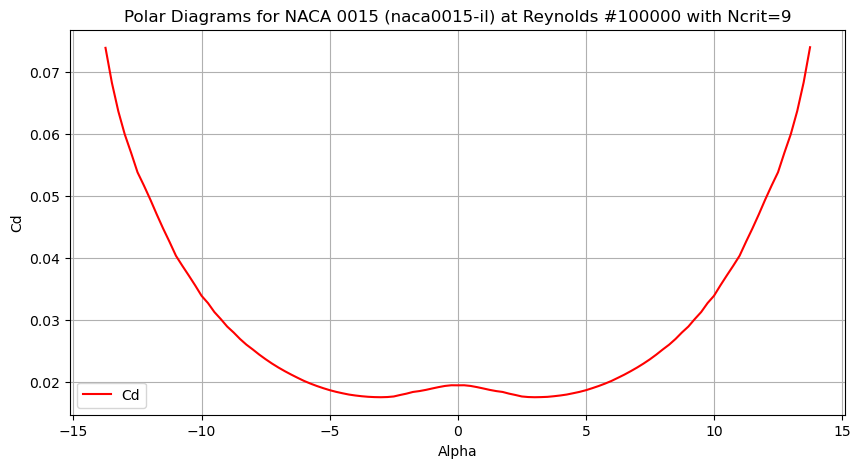

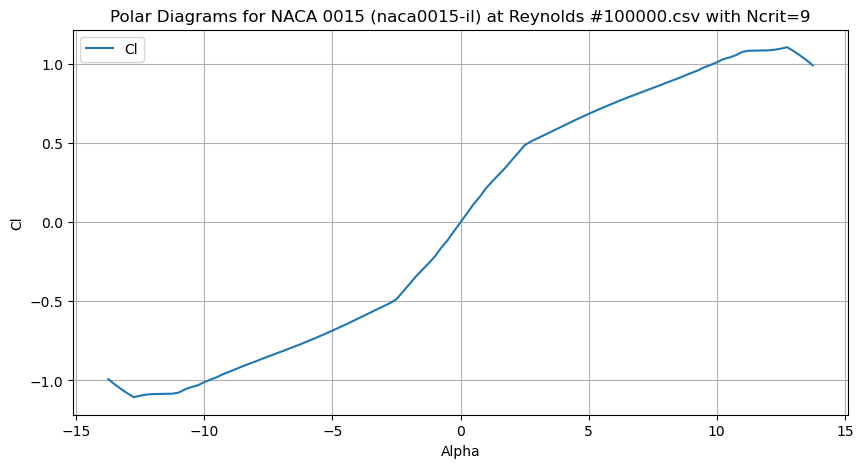

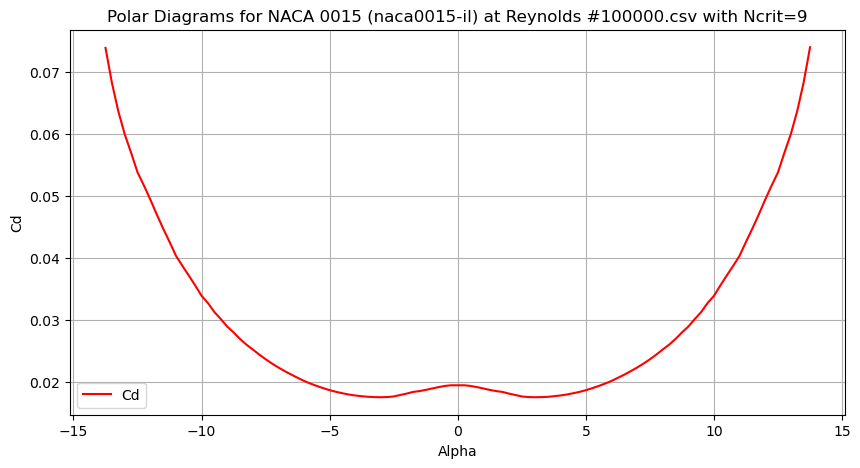

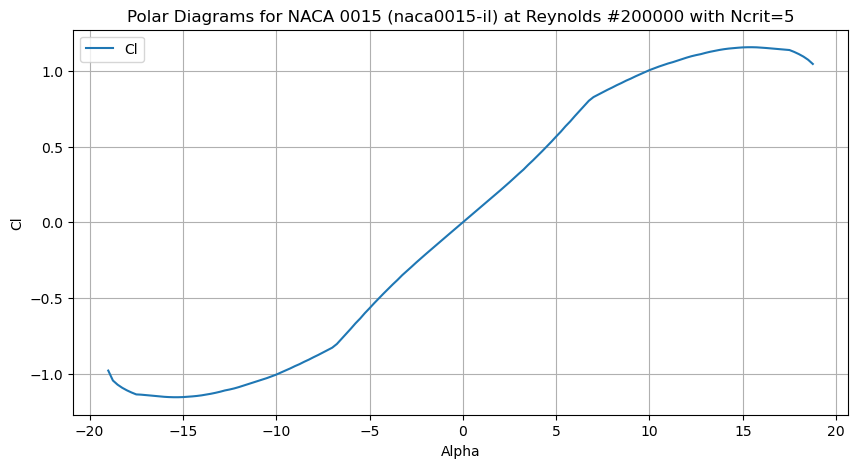

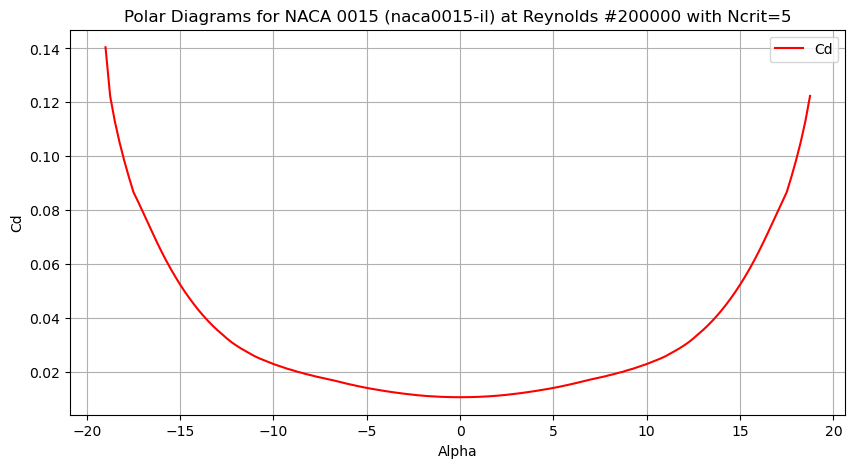

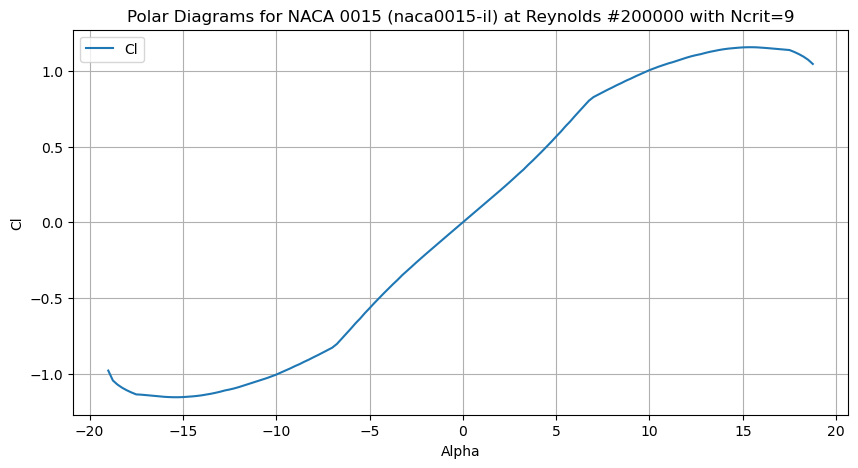

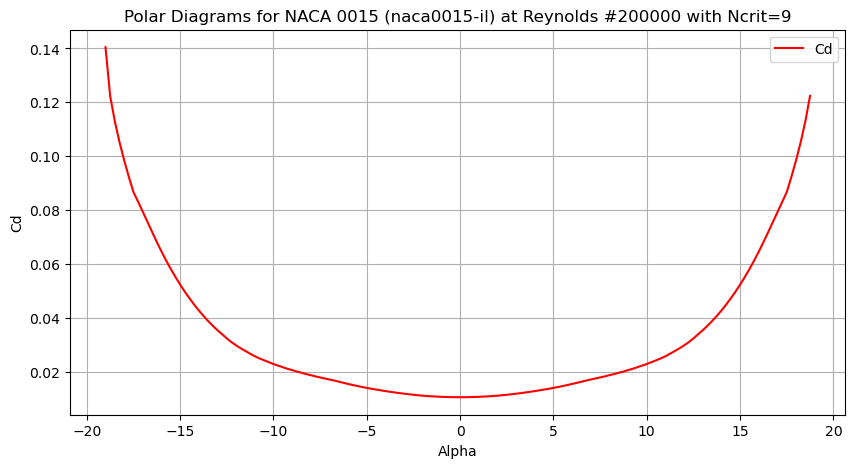

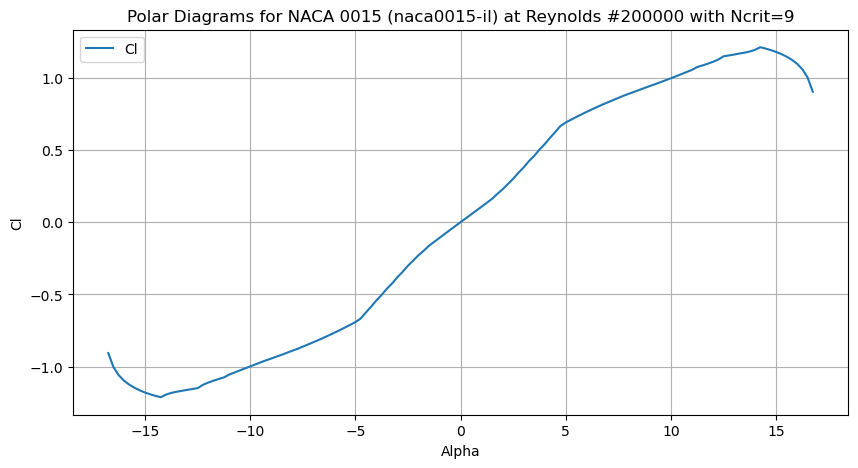

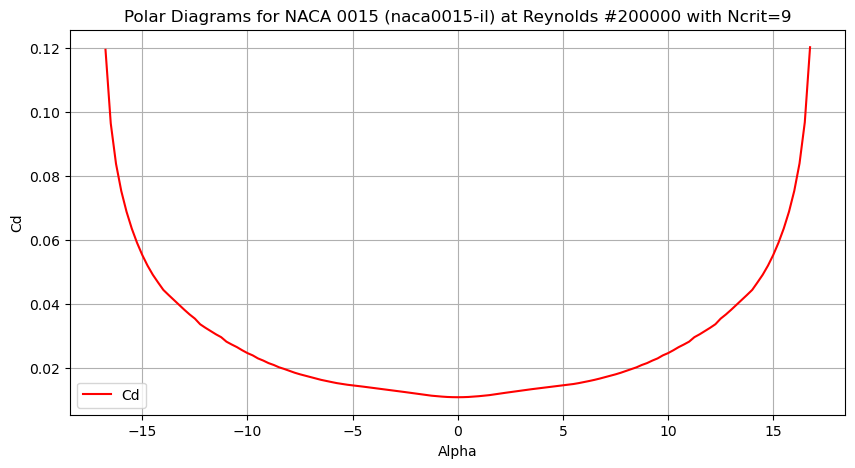

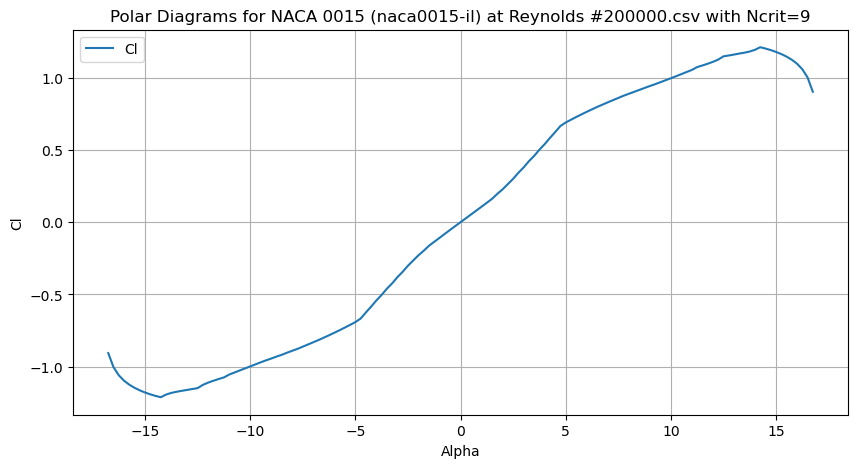

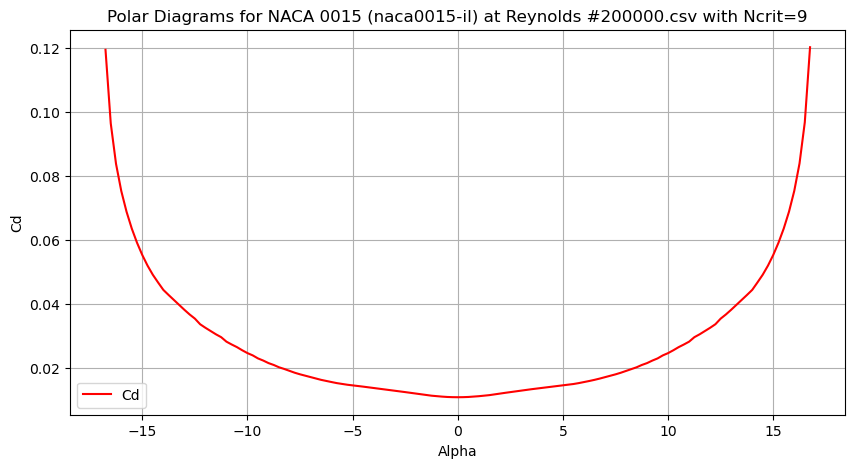

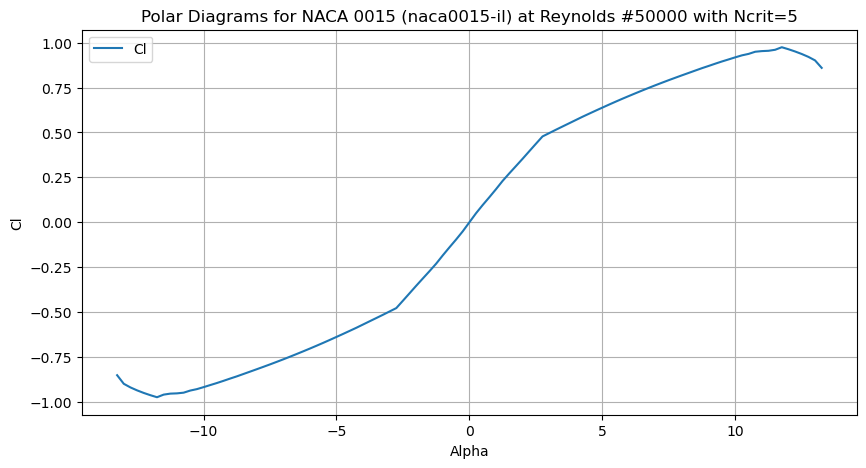

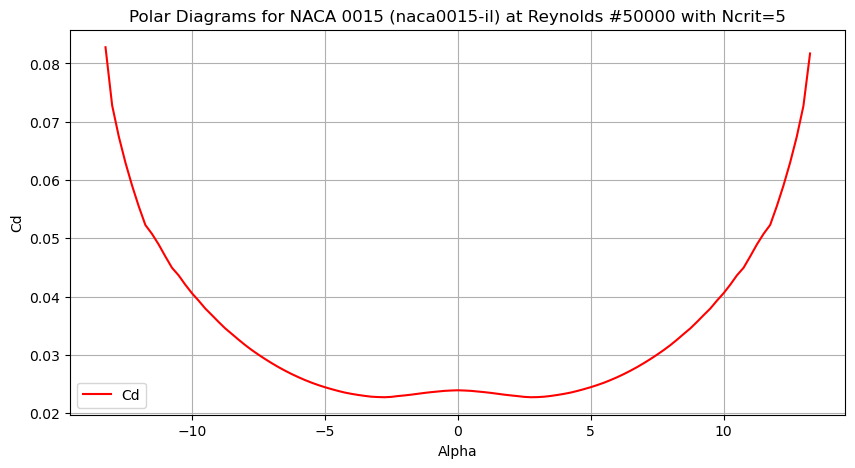

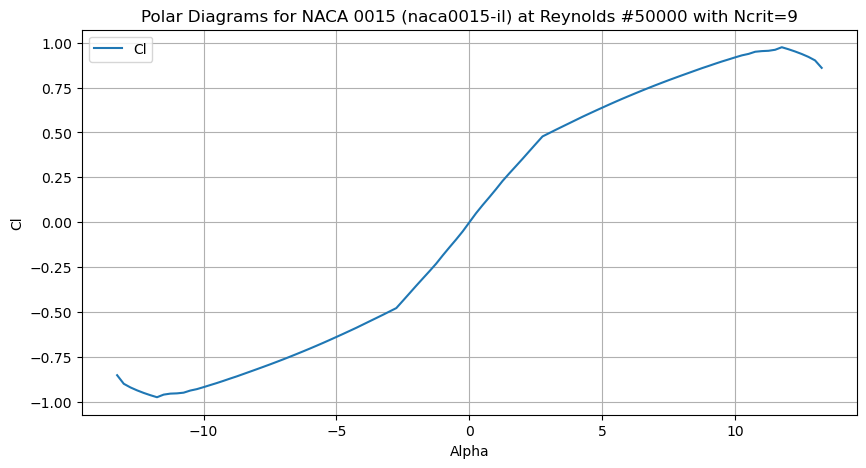

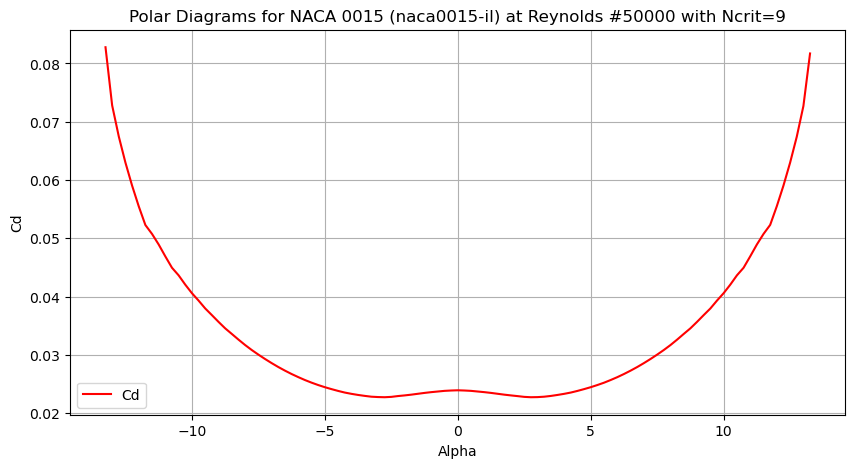

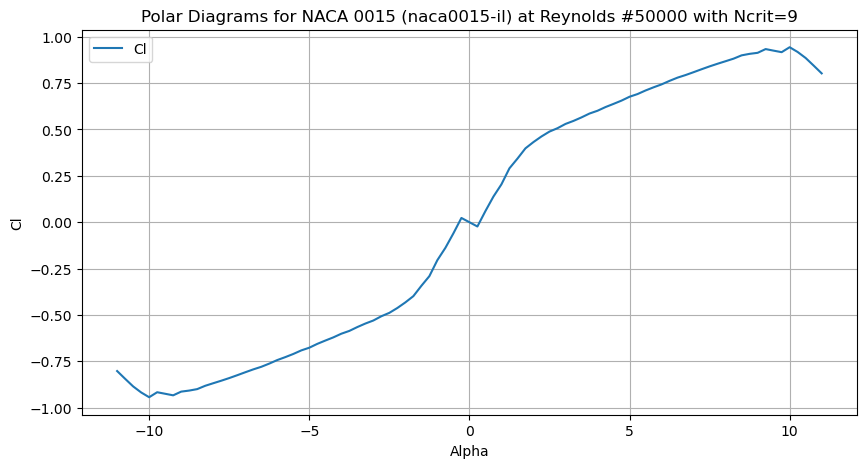

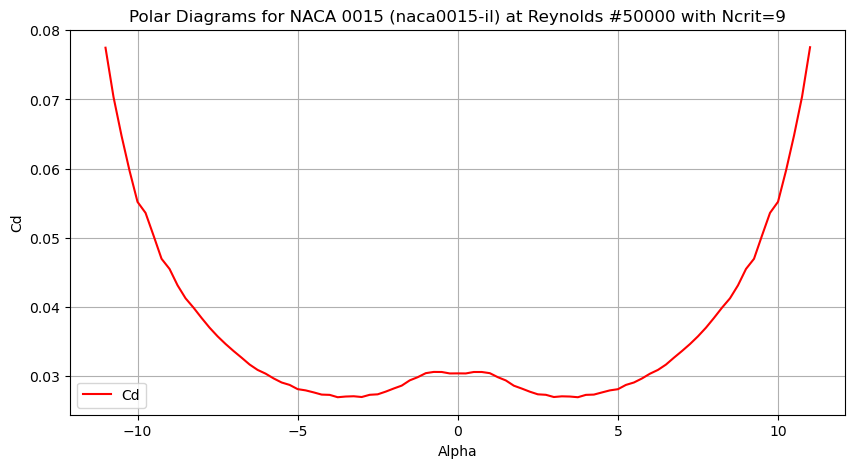

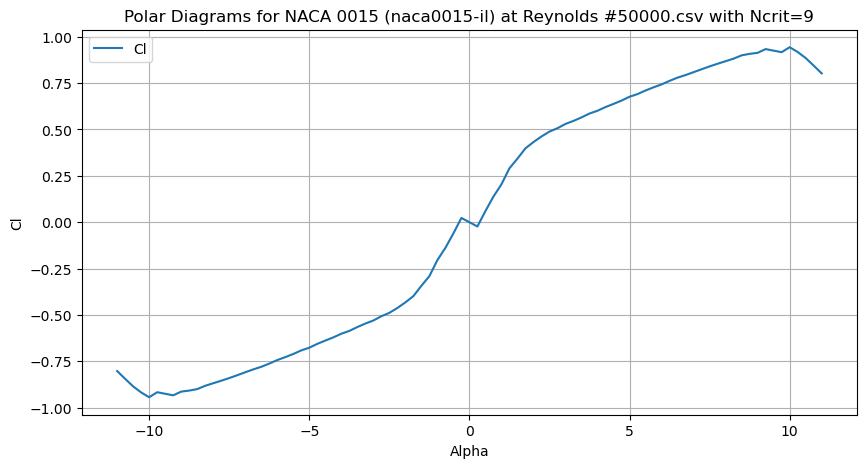

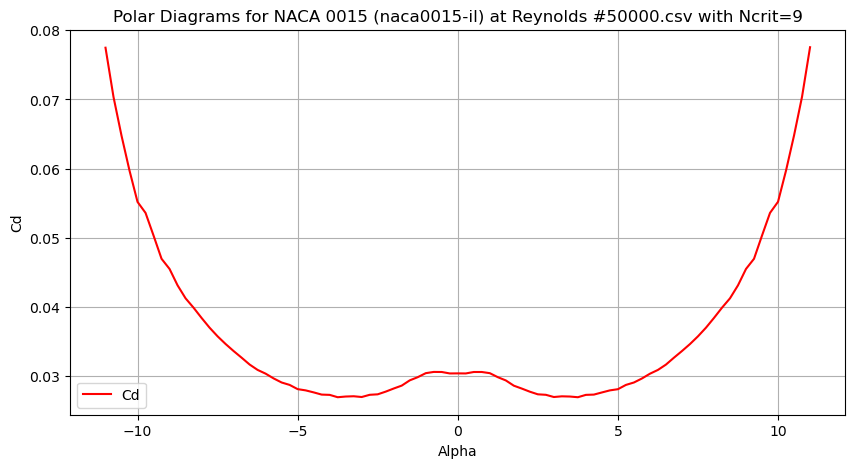

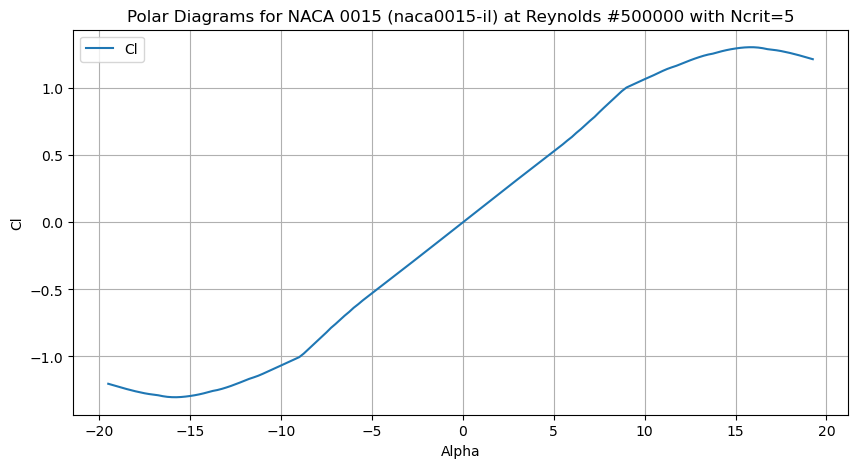

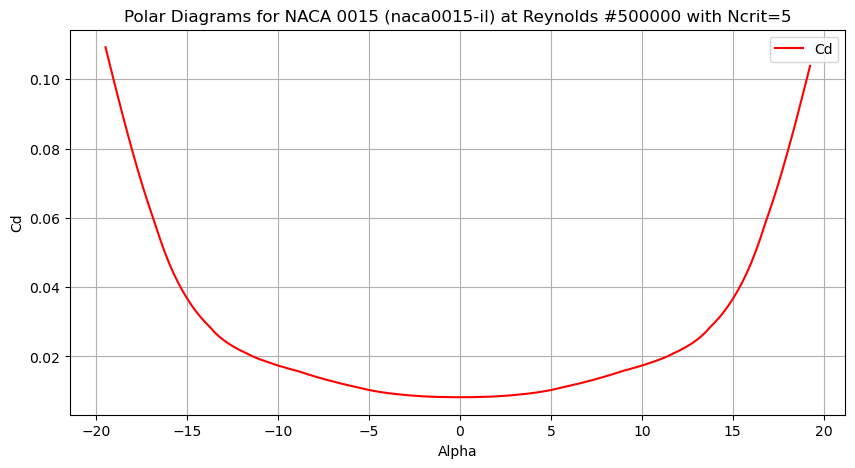

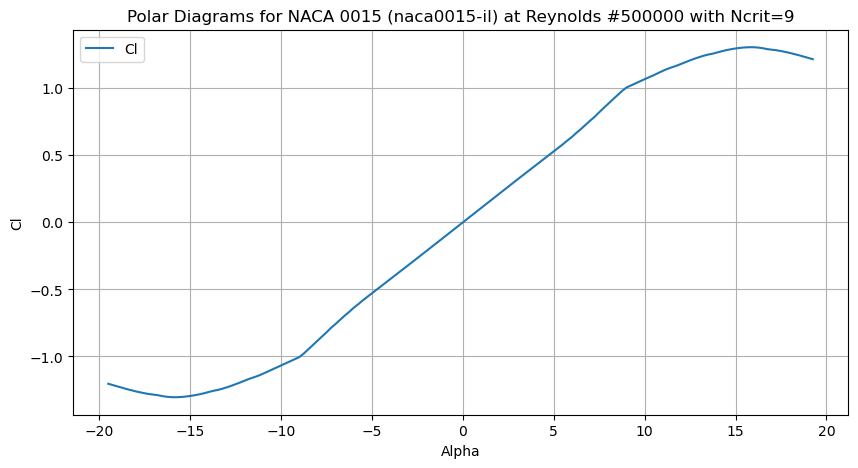

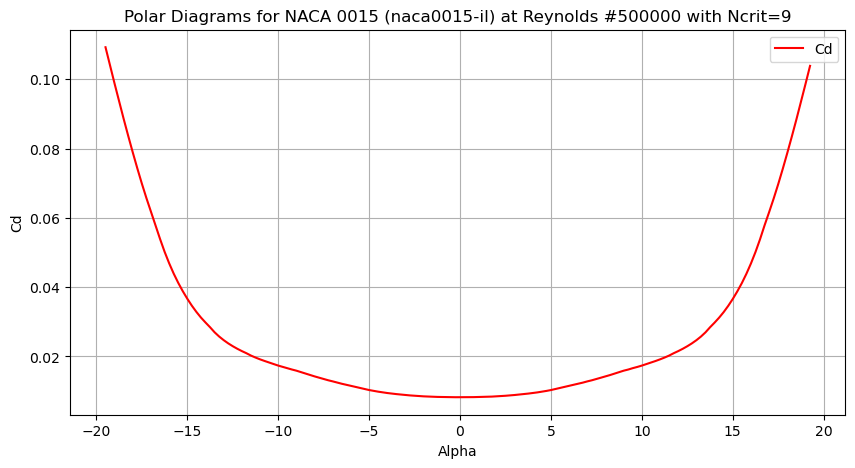

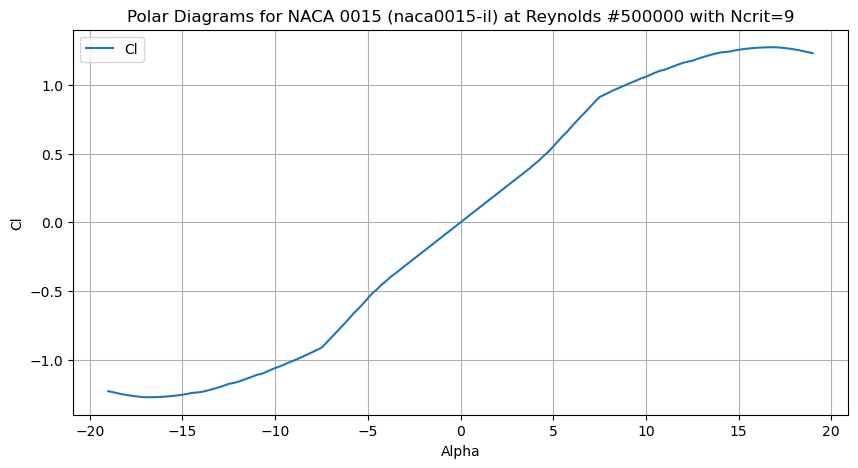

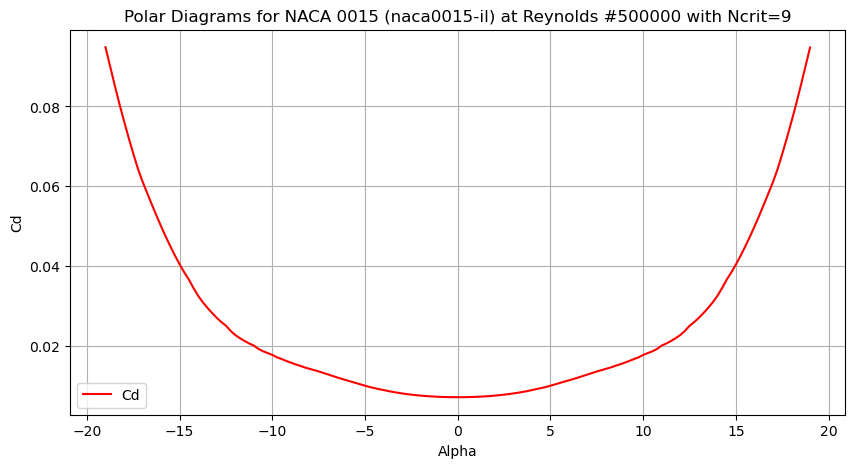

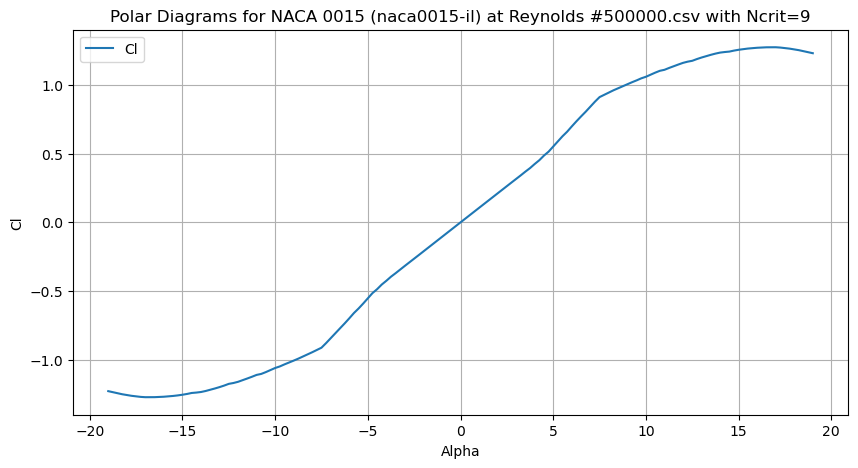

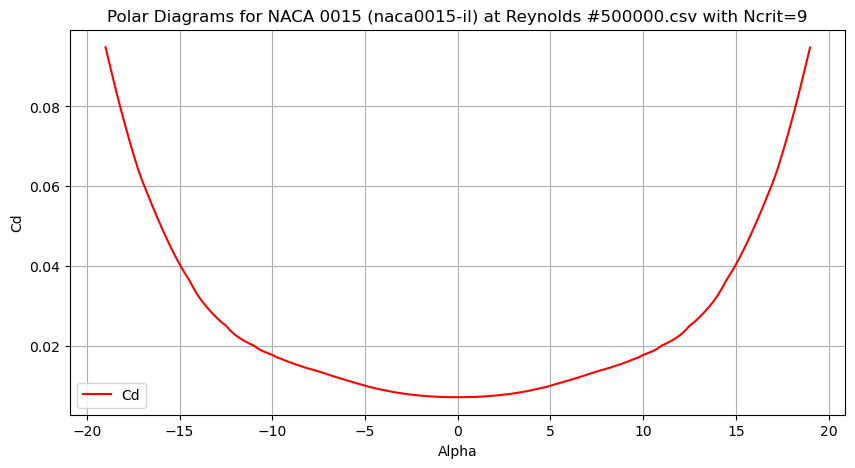

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Get the current working directory
directory = os.getcwd()

# Iterate through all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read the CSV file, skip the first 10 rows
        data = pd.read_csv(os.path.join(directory, filename), skiprows=10)
        
        # Extract Reynolds number and Ncrit from the filename
        reynolds = filename.split('-')[3]
        n_crit = '5' if 'n5' in filename else '9'
        
        # Create a title for the chart
        title = f"Polar Diagrams for NACA 0015 (naca0015-il) at Reynolds #{reynolds} with Ncrit={n_crit}"

        # Plot Cl vs. Alpha
        plt.figure(figsize=(10, 5))
        plt.plot(data['Alpha'], data['Cl'], label='Cl')
        plt.title(title)
        plt.xlabel('Alpha')
        plt.ylabel('Cl')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Plot Cd vs. Alpha
        plt.figure(figsize=(10, 5))
        plt.plot(data['Alpha'], data['Cd'], label='Cd', color='red')
        plt.title(title)
        plt.xlabel('Alpha')
        plt.ylabel('Cd')
        plt.grid(True)
        plt.legend()
        plt.show()


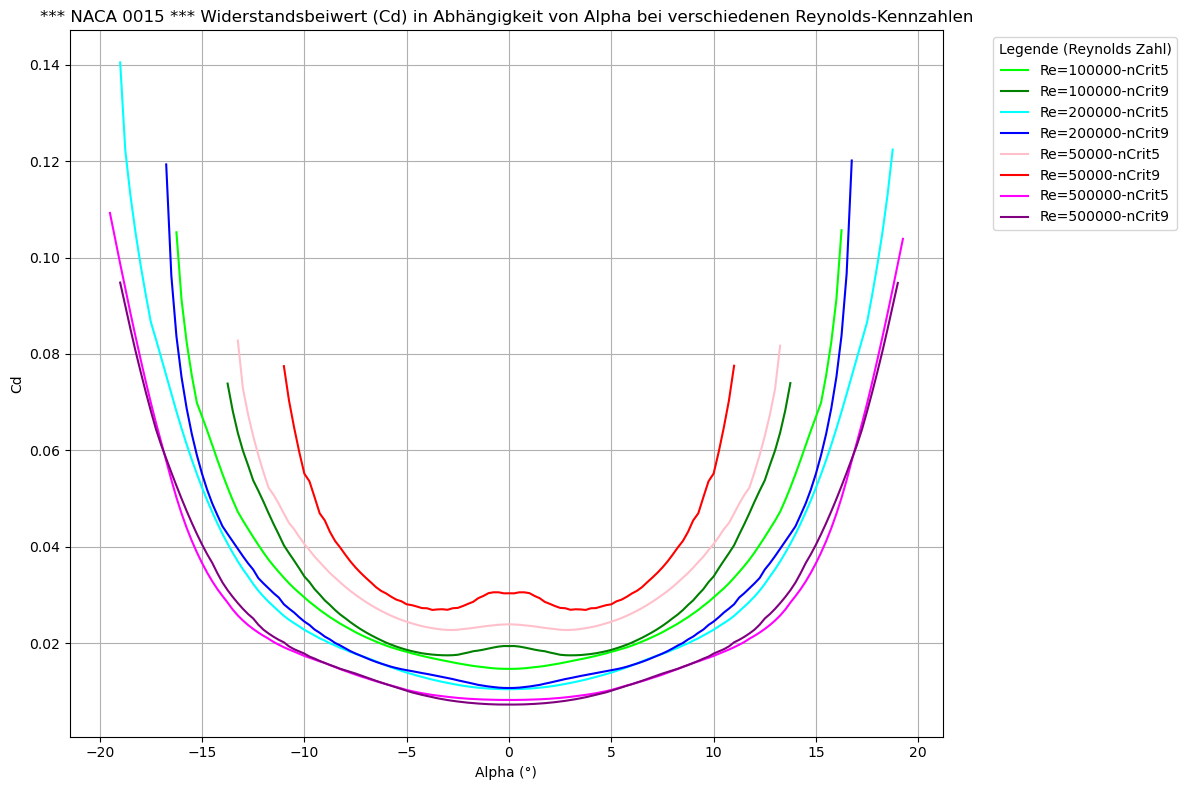

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Pfad des aktuellen Arbeitsverzeichnisses, wo die CSV-Dateien gespeichert sind
directory = os.getcwd()
# Initialisieren einer Liste für die Legendenbeschriftungen
legend_labels = []

# Farben für die verschiedenen Reynolds-Zahlen definieren
colors = {
    '50000-nCrit9': 'red',
    '50000-nCrit5': 'pink',
    '100000-nCrit9': 'green',
    '100000-nCrit5': 'lime',
    '200000-nCrit9': 'blue',
    '200000-nCrit5': 'cyan',
    '500000-nCrit9': 'purple',
    '500000-nCrit5': 'magenta'
}

# Neue Figur für das Diagramm erstellen
plt.figure(figsize=(12, 8))

# Alle CSV-Dateien im Verzeichnis durchlaufen und Cd-Werte plotten
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv') and 'xf-naca0015-il' in filename:
        # Relevante Nummer aus dem Dateinamen extrahieren und Dateiendung ".csv" entfernen
        reynolds_key = filename.split('-il-')[-1].replace('.csv', '')
        
        # Pfad zur CSV-Datei
        filepath = os.path.join(directory, filename)
        
        # CSV-Datei einlesen und die ersten 10 Zeilen überspringen
        data = pd.read_csv(filepath, skiprows=10)
        
        # Legendenbeschriftung für jeden Plot hinzufügen
        legend_label = f'Re={reynolds_key}'
        legend_labels.append(legend_label)
        
        # Cd über Alpha mit verschiedenen Farben basierend auf Reynolds-Zahlen plotten
        plt.plot(data['Alpha'], data['Cd'], label=legend_label, color=colors[reynolds_key])

# Legende hinzufügen und außerhalb des Diagramms platzieren
plt.legend(title='Legende (Reynolds Zahl)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Achsenbeschriftungen und Titel des Diagramms festlegen
plt.xlabel('Alpha (°)')
plt.ylabel('Cd')
plt.title('*** NACA 0015 *** Widerstandsbeiwert (Cd) in Abhängigkeit von Alpha bei verschiedenen Reynolds-Kennzahlen')

# Gitter im Diagramm anzeigen
plt.grid(True)

# Diagramm anzeigen
plt.tight_layout()
plt.show()



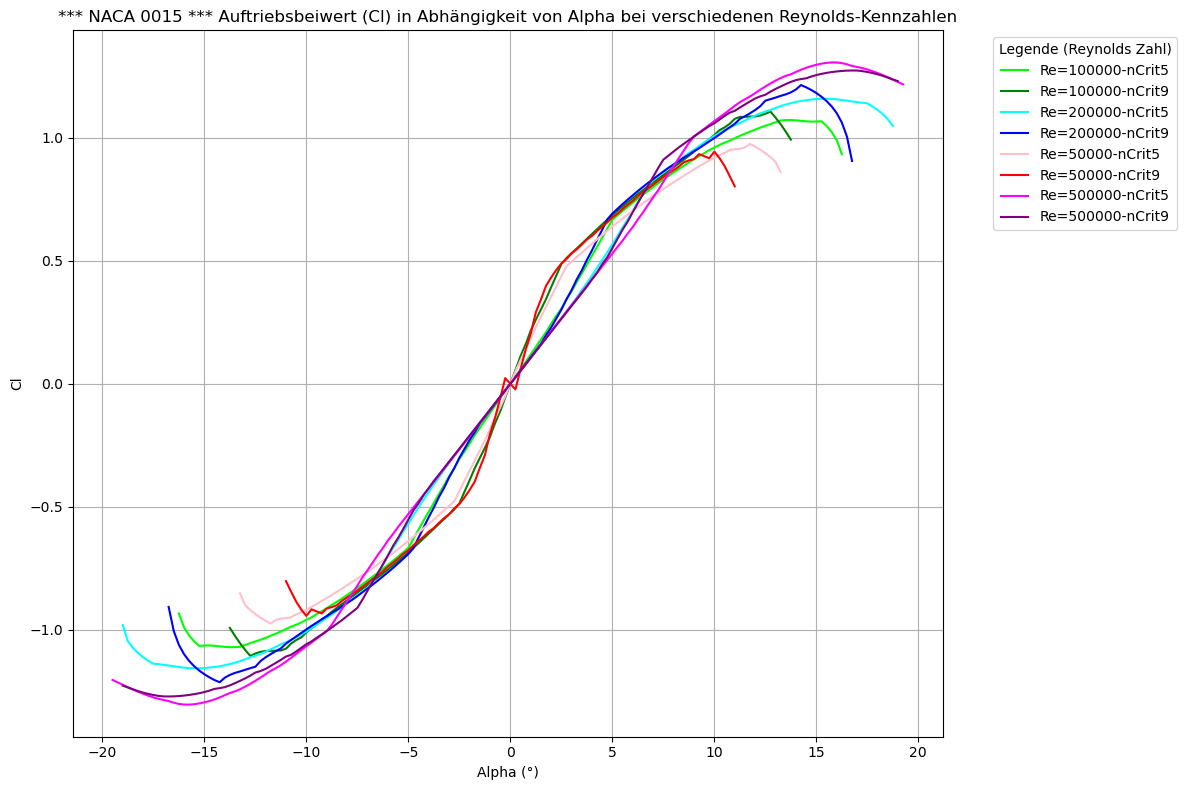

In [15]:
# Auftriebsbeiwert (Cl) in Abhängigkeit von Alpha bei verschiedenen Reynolds-Kennzahlen.

# Farben für die unterschiedlichen Reynolds-Zahlen definieren
colors = {
    '50000-nCrit9': 'red',
    '50000-nCrit5': 'pink',
    '100000-nCrit9': 'green',
    '100000-nCrit5': 'lime',
    '200000-nCrit9': 'blue',
    '200000-nCrit5': 'cyan',
    '500000-nCrit9': 'purple',
    '500000-nCrit5': 'magenta'
}

# Neue Figur für den Plot erstellen
plt.figure(figsize=(12, 8))

# Alle CSV-Dateien im Verzeichnis durchlaufen und Cl-Werte plotten
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv') and 'xf-naca0015-il' in filename:
        # Relevante Nummer aus dem Dateinamen extrahieren und Dateiendung ".csv" entfernen
        reynolds_key = filename.split('-il-')[-1].replace('.csv', '')
        
        # Pfad zur CSV-Datei
        filepath = os.path.join(directory, filename)
        
        # CSV-Datei einlesen und die ersten 10 Zeilen überspringen
        data = pd.read_csv(filepath, skiprows=10)
        
        # Legendenbeschriftung für jeden Plot hinzufügen
        legend_label = f'Re={reynolds_key}'
        legend_labels.append(legend_label)
        
        # Cl über Alpha mit unterschiedlichen Farben basierend auf Reynolds-Zahlen plotten
        plt.plot(data['Alpha'], data['Cl'], label=legend_label, color=colors[reynolds_key])

# Legende hinzufügen und außerhalb des Diagramms platzieren
plt.legend(title='Legende (Reynolds Zahl)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Achsenbeschriftungen und Titel des Diagramms festlegen
plt.xlabel('Alpha (°)')
plt.ylabel('Cl')
plt.title('*** NACA 0015 *** Auftriebsbeiwert (Cl) in Abhängigkeit von Alpha bei verschiedenen Reynolds-Kennzahlen')

# Gitter im Diagramm anzeigen
plt.grid(True)

# Diagramm anzeigen
plt.tight_layout()
plt.show()



In [6]:
# Plotting the Pressure Drag Coefficient (Cdp) vs. Alpha at different Reynolds numbers.

# Define colors for different Reynolds numbers
colors = {
    '50000-nCrit9': 'red',
    '50000-nCrit5': 'pink',
    '100000-nCrit9': 'green',
    '100000-nCrit5': 'lime',
    '200000-nCrit9': 'blue',
    '200000-nCrit5': 'cyan',
    '500000-nCrit9': 'purple',
    '500000-nCrit5': 'magenta'
}

# Create a new figure for the plot
plt.figure(figsize=(12, 8))

# Assuming the directory with the CSV files is named 'directory'
directory = os.getcwd()
legend_labels = []  # Initialize legend labels

# Iterate through all CSV files in the directory and plot the Cdp values
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv') and 'xf-naca0015-il' in filename:
        # Extract the relevant number from the filename
        reynolds_key = filename.split('-il-')[-1].replace('.csv', '')
        
        # Path to the CSV file
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file, skip the first rows with header information
        data = pd.read_csv(filepath, skiprows=lambda x: x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
        
        # Add a legend label for each plot
        legend_label = f'Re={reynolds_key}'
        legend_labels.append(legend_label)
        
        # Plot Cdp vs. Alpha with different colors based on Reynolds numbers
        plt.plot(data['Alpha'], data['Cdp'], label=legend_label, color=colors[reynolds_key])

# Add the legend and place it outside of the plot
plt.legend(title='Legend (Reynolds Number)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Define the axis labels and the plot title
plt.xlabel('Alpha (°)')
plt.ylabel('Cdp')
plt.title('Pressure Drag Coefficient (Cdp) vs. Angle of Attack (Alpha) at Different Reynolds Numbers')

# Show the grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


KeyError: '100000-n5'

<Figure size 1200x800 with 0 Axes>

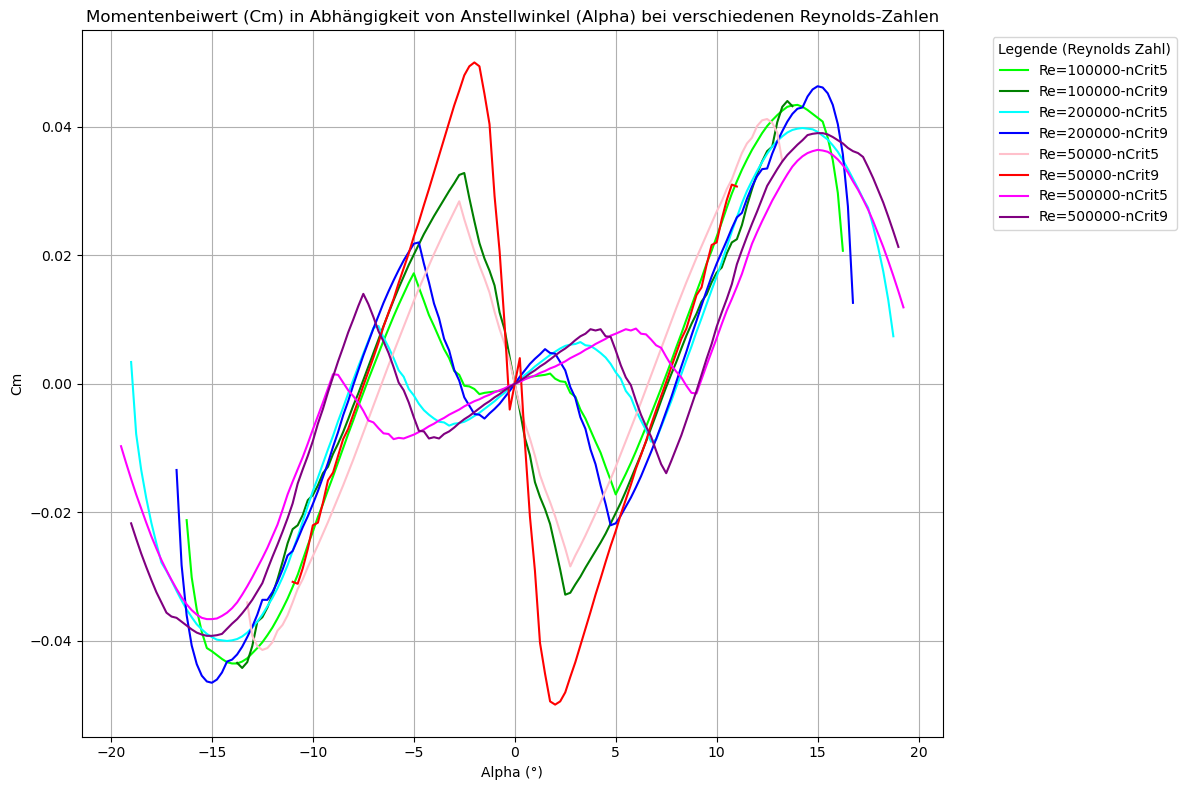

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Definition von Farben für verschiedene Reynolds-Zahlen
colors = {
    '50000-nCrit9': 'red',
    '50000-nCrit5': 'pink',
    '100000-nCrit9': 'green',
    '100000-nCrit5': 'lime',
    '200000-nCrit9': 'blue',
    '200000-nCrit5': 'cyan',
    '500000-nCrit9': 'purple',
    '500000-nCrit5': 'magenta'
}

# Erstellung einer neuen Plot-Figur
plt.figure(figsize=(12, 8))

# Angenommen, das Verzeichnis mit den CSV-Dateien heißt 'directory'
directory = os.getcwd()  # Bitte durch Ihren tatsächlichen Verzeichnispfad ersetzen
legend_labels = []  # Initialisierung der Legendenbeschriftungen

# Durchlaufen aller CSV-Dateien im Verzeichnis und Plotten der Cm-Werte
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv') and 'xf-naca0015-il' in filename:
        # Extraktion der relevanten Nummer aus dem Dateinamen
        reynolds_key = filename.split('-il-')[-1].replace('.csv', '')
        
        # Pfad zur CSV-Datei
        filepath = os.path.join(directory, filename)
        
        # Einlesen der CSV-Datei, Überspringen der ersten Zeilen mit Header-Informationen
        data = pd.read_csv(filepath, skiprows=lambda x: x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
        
        # Hinzufügen einer Legendenbeschriftung für jeden Plot
        legend_label = f'Re={reynolds_key}'
        legend_labels.append(legend_label)
        
        # Plotten von Cm über Alpha mit verschiedenen Farben entsprechend der Reynolds-Zahl
        plt.plot(data['Alpha'], data['Cm'], label=legend_label, color=colors[reynolds_key])

# Hinzufügen der Legende außerhalb des Plots
plt.legend(title='Legende (Reynolds Zahl)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Achsenbeschriftungen und Titel des Plots definieren
plt.xlabel('Alpha (°)')
plt.ylabel('Cm')
plt.title('Momentenbeiwert (Cm) in Abhängigkeit von Anstellwinkel (Alpha) bei verschiedenen Reynolds-Zahlen')

# Gitter anzeigen
plt.grid(True)

# Plot anzeigen
plt.tight_layout()
plt.show()


In [7]:
import numpy as np

# Define constants
rho = 1.225  # Air density in kg/m^3
c = 0.38     # Chord length in meters
l = 2        # Height of turbine blades in meters

# Function to calculate lift force
def calculate_lift_force(CL, v):
    return 0.5 * rho * v**2 * c * l * CL

# Example: Calculate lift force for a CL value of 1.0 and wind speeds from 5 to 15 m/s
CL_example = 1.0  # Example CL value
v_range = np.arange(5, 16, 1)  # Wind speeds from 5 m/s to 15 m/s

# Calculate lift forces for the range of wind speeds
lift_forces = [calculate_lift_force(CL_example, v) for v in v_range]
lift_forces


[11.637500000000001,
 16.758,
 22.809500000000003,
 29.792,
 37.7055,
 46.550000000000004,
 56.32550000000001,
 67.032,
 78.6695,
 91.23800000000001,
 104.7375]

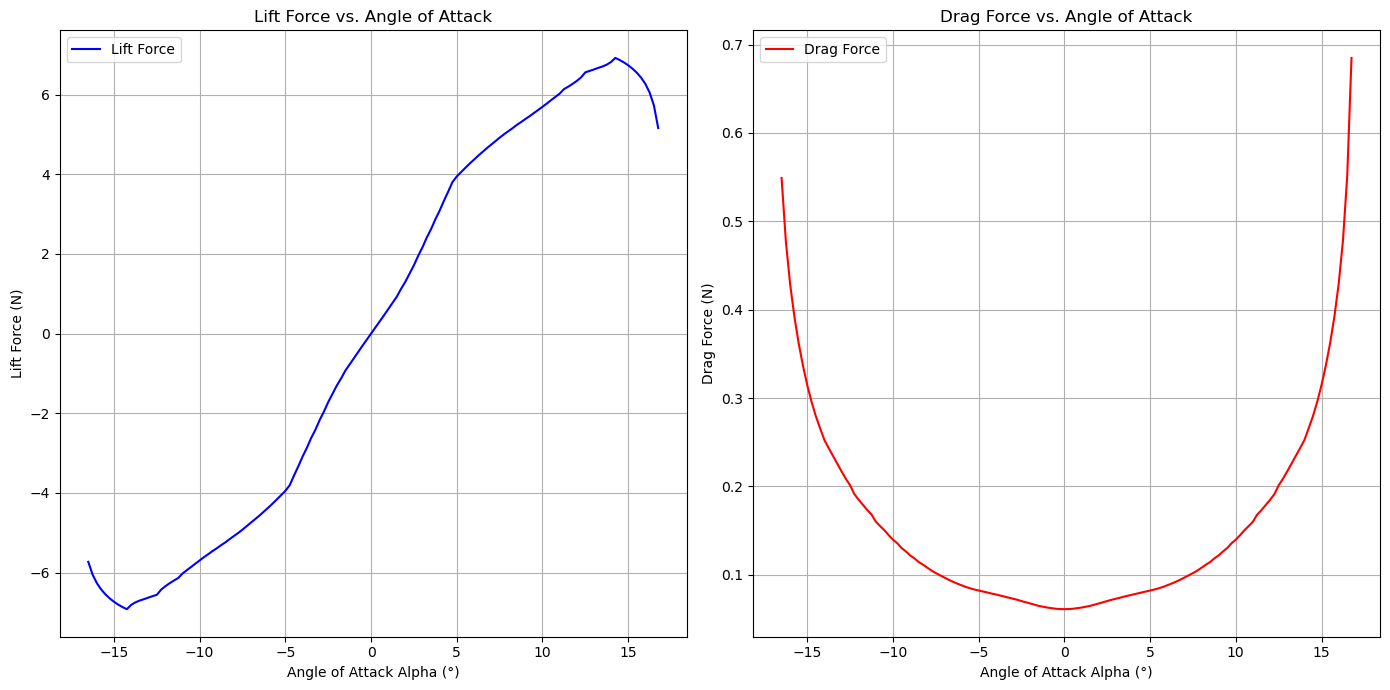

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the CSV file
file_path = 'xf-naca0015-il-200000-nCrit9.csv'

# Read data from the CSV file
# Since the first few rows contain information, we start reading from row 12
data = pd.read_csv(file_path, skiprows=12, delimiter=',', header=None)

# Define column names according to the provided data structure
data.columns = ['Alpha', 'Cl', 'Cd', 'Cdp', 'Cm', 'Top_Xtr', 'Bot_Xtr']

# Define constants
rho = 1.225  # Air density in kg/m^3
c = 0.38     # Chord length in meters
l = 2        # Height of turbine blades in meters
R = 1.1      # Turbine radius in meters (diameter 2.2 m)

# Functions to calculate forces
def calculate_lift_force(cl, v):
    return 0.5 * rho * v**2 * c * l * cl

def calculate_drag_force(cd, v):
    return 0.5 * rho * v**2 * c * l * cd

# Assuming a constant wind speed of 3.5 m/s for the example calculation
v_wind = 3.5

# Calculate lift and drag forces
data['Lift_Force'] = calculate_lift_force(data['Cl'], v_wind)
data['Drag_Force'] = calculate_drag_force(data['Cd'], v_wind)

# Plotting lift and drag forces as a function of angle of attack
plt.figure(figsize=(14, 7))

# Lift Force Plot
plt.subplot(1, 2, 1)
plt.plot(data['Alpha'], data['Lift_Force'], label='Lift Force', color='blue')
plt.xlabel('Angle of Attack Alpha (°)')
plt.ylabel('Lift Force (N)')
plt.title('Lift Force vs. Angle of Attack')
plt.grid(True)
plt.legend()

# Drag Force Plot
plt.subplot(1, 2, 2)
plt.plot(data['Alpha'], data['Drag_Force'], label='Drag Force', color='red')
plt.xlabel('Angle of Attack Alpha (°)')
plt.ylabel('Drag Force (N)')
plt.title('Drag Force vs. Angle of Attack')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# Program for calculating and visualizing lift and drag forces
# based on wind tunnel data for a NACA 0015 airfoil profile at a given wind speed.

# Step 1: Reading data from a CSV file
# The CSV file contains information about angles of attack (Alpha), lift coefficients (Cl),
# drag coefficients (Cd), and other parameters.

# Step 2: Definition of constants
# Here, physical constants and geometry information for the turbine blade are defined.

# Step 3: Calculation of lift and drag forces
# Based on the provided data and wind speed, the lift force and drag force are calculated.

# Step 4: Visualization of results
# The calculated forces are graphically represented as a function of angle of attack.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Path to the CSV file
file_path = 'xf-naca0015-il-200000-nCrit9.csv'

# Read data from the CSV file
data = pd.read_csv(file_path, skiprows=12, delimiter=',', header=None)

# Define column names according to the provided data structure
data.columns = ['Alpha', 'Cl', 'Cd', 'Cdp', 'Cm', 'Top_Xtr', 'Bot_Xtr']

# Define constants
rho = 1.225  # Air density in kg/m^3
c = 0.38     # Chord length in meters
l = 2        # Height of turbine blades in meters
R = 1.1      # Turbine radius in meters (diameter 2.2 m)

# Functions to calculate forces
def calculate_lift_force(cl, v):
    return 0.5 * rho * v**2 * c * l * cl

def calculate_drag_force(cd, v):
    return 0.5 * rho * v**2 * c * l * cd

# Interactive plot
@interact(v_wind=(3.5, 10.0, 0.1))
def interactive_forces_plot(v_wind=10.0):
    data['Lift_Force'] = calculate_lift_force(data['Cl'], v_wind)
    data['Drag_Force'] = calculate_drag_force(data['Cd'], v_wind)
    
    plt.figure(figsize=(14, 7))

    # Lift Force Plot
    plt.subplot(1, 2, 1)
    plt.plot(data['Alpha'], data['Lift_Force'], label='Lift Force', color='blue')
    plt.xlabel('Angle of Attack Alpha (°)')
    plt.ylabel('Lift Force (N)')
    plt.title(f'Lift Force vs. Angle of Attack at {v_wind} m/s')
    plt.grid(True)
    plt.legend()

    # Drag Force Plot
    plt.subplot(1, 2, 2)
    plt.plot(data['Alpha'], data['Drag_Force'], label='Drag Force', color='red')
    plt.xlabel('Angle of Attack Alpha (°)')
    plt.ylabel('Drag Force (N)')
    plt.title(f'Drag Force vs. Angle of Attack at {v_wind} m/s')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=10.0, description='v_wind', max=10.0, min=3.5), Output()), _dom_classe…

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Gegebene Konstanten
rho = 1.225  # Luftdichte in kg/m^3
c = 0.42     # Chordlänge in Metern
l = 2        # Höhe der Turbinenblätter in Metern
R = 1.1      # Radius der Turbine in Metern (Durchmesser 2.2 m)
A = np.pi * R**2  # Rotorfläche in m^2
g = 9.81  # Erdbeschleunigung in m/s^2
resistance_weight = 20  # Widerstandsgewicht in kg

# Funktionen zur Berechnung der Kräfte
def calculate_lift_force(cl, v):
    return 0.5 * rho * v**2 * c * l * cl

def calculate_drag_force(cd, v):
    return 0.5 * rho * v**2 * c * l * cd

def calculate_theoretical_power(v, A):
    return (16/27) * 0.5 * rho * A * v**3

def calculate_resistance_torque(R, resistance_weight):
    return resistance_weight * g * R

# Interaktiver Plot mit Berücksichtigung des Betzschen Gesetzes und Widerstandsmoments
@interact(v_wind=(3.5, 10.0, 0.1))
def interactive_forces_plot(v_wind=10.0):
    # Daten einlesen
    file_path = 'xf-naca0015-il-200000-nCrit9.csv'
    data = pd.read_csv(file_path, skiprows=12, delimiter=',', header=None)
    data.columns = ['Alpha', 'Cl', 'Cd', 'Cdp', 'Cm', 'Top_Xtr', 'Bot_Xtr']
    
    # Berechnung der Auftriebs- und Widerstandskräfte
    data['Lift_Force'] = calculate_lift_force(data['Cl'], v_wind)
    data['Drag_Force'] = calculate_drag_force(data['Cd'], v_wind)
    
    # Betzsches Gesetz und Widerstandsmoment
    theoretical_power = calculate_theoretical_power(v_wind, A)
    resistance_torque = calculate_resistance_torque(R, resistance_weight)
    
    plt.figure(figsize=(14, 7))

    # Auftriebskraft-Plot
    plt.subplot(1, 2, 1)
    plt.plot(data['Alpha'], data['Lift_Force'], label='Auftriebskraft', color='blue')
    plt.xlabel('Anstellwinkel Alpha (°)')
    plt.ylabel('Auftriebskraft (N)')
    plt.title(f'Auftriebskraft bei {v_wind} m/s (Betz-Grenze: {theoretical_power:.2f} W)')
    plt.grid(True)
    plt.legend()

    # Widerstandskraft-Plot
    plt.subplot(1, 2, 2)
    plt.plot(data['Alpha'], data['Drag_Force'], label='Widerstandskraft', color='red')
    plt.xlabel('Anstellwinkel Alpha (°)')
    plt.ylabel('Widerstandskraft (N)')
    plt.title(f'Widerstandskraft und Widerstandsmoment bei {v_wind} m/s (Widerstandsmoment: {resistance_torque:.2f} Nm)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()




interactive(children=(FloatSlider(value=10.0, description='v_wind', max=10.0, min=3.5), Output()), _dom_classe…